___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 2<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br><h1>

# Installing Tensorflow

In [1]:
!python --version

Python 3.8.8


In [2]:
 pip install tensorflow

     -------------------------------------- 455.9/455.9 MB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 kB ? eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 5.6 MB/s eta 0:00:00
     -------------------------------------- 438.7/438.7 kB 9.3 MB/s eta 0:00:00
     -------------------------------------- 123.4/123.4 kB 7.1 MB/s eta 0:00:00
     -------------------------------------- 896.1/896.1 kB 7.1 MB/s eta 0:00:00
     ---------------------------------------- 3.6/3.6 MB 7.7 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 7.6 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 8.7 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 9.4 MB/s eta 0:00:00
     -------------------------------------- 781.3/781.3

In [3]:
import tensorflow as tf
tf.__version__

'2.10.0'

# Keras Syntax Basics

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")

In [5]:
df = pd.read_csv("fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [6]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


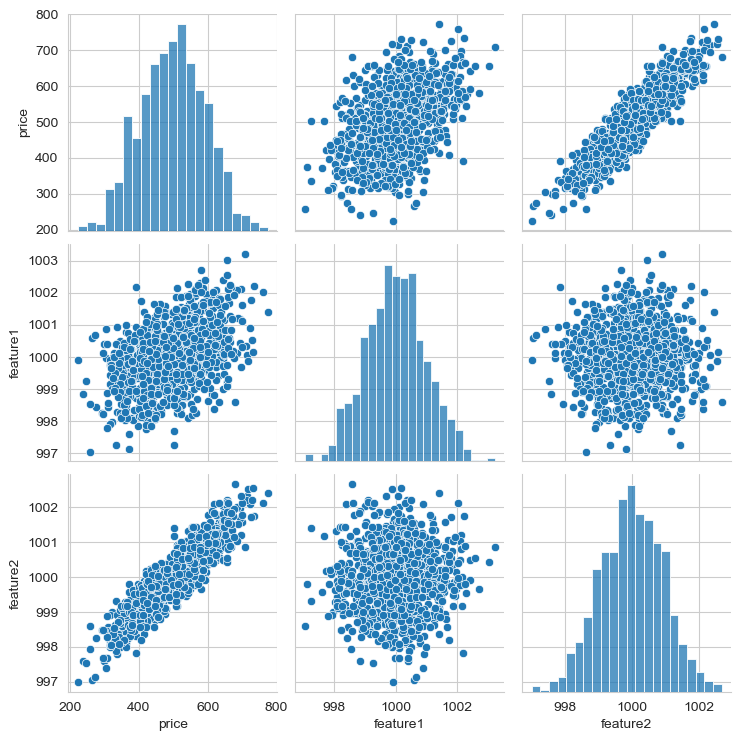

In [9]:
sns.pairplot(df);

In [10]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


## Preprocessing of Data
- Train | Test Split, Scalling

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# X = df[['feature1', 'feature2']].values  # convert to array
# y = df['price'].values

In [13]:
X = df[['feature1', 'feature2']] 
y = df['price']

In [14]:
X

,feature1,feature2
0,999.788,999.766
1,998.862,1001.042
2,1000.070,998.844
3,999.952,1000.441
4,1000.446,1000.339
...,...,...
995,1000.019,999.673
996,998.855,1000.020
997,1001.452,998.848
998,1000.771,998.563


In [15]:
y

0     461.528
1     548.130
2     410.297
3     540.382
4     546.025
        ...  
995   476.526
996   457.313
997   456.721
998   403.316
999   599.367
Name: price, Length: 1000, dtype: float64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [17]:
X_train.shape

(700, 2)

In [18]:
X_test.shape

(300, 2)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : b

In [21]:
scaler = MinMaxScaler()

In [22]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

In [23]:
import tensorflow as tf

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Activation

In [90]:
# help(Sequential)

In [91]:
# help(Dense)

In [25]:
X_train.shape

(700, 2)

In [93]:
# First way to create model

model = Sequential([Input(shape = X_train.shape[1]),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)])

In [26]:
# Second way to create model (recommended)

model = Sequential()
#model.add(Input(shape = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 0.6237118 ,  0.28228378, -0.24564838,  0.7839701 ],
        [ 0.42194843, -0.1064961 ,  0.52720404, -0.99128604]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.4815318 ,  0.09545016,  0.8340362 , -0.08517903],
        [-0.2632807 ,  0.42647153, -0.8460203 ,  0.12009853],
        [-0.8594206 , -0.6921818 ,  0.1416592 ,  0.15699261],
        [-0.58278394, -0.08748144,  0.5130828 , -0.4427435 ]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_2/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.05324119,  0.5443217 ,  0.4186042 , -0.43914586],
        [ 0.286035  ,  0.29432327,  0.1847853 , -0.6968137 ],
        [ 0.7357121 , -0.06736666,  0.4345278 

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [29]:
model.compile(optimizer = "rmsprop", loss = "mse")

In [30]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 256412.5938
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256220.5000
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256035.0781
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 255838.3125
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 255617.8281
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 255366.3750
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 255078.9062
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 254754.4844
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 254393.2812
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 253986.6719
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 253538.4531
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

22/22 [==============================] - 0s 1ms/step - loss: 2241.0295
Epoch 98/250
22/22 [==============================] - 0s 1ms/step - loss: 2205.8794
Epoch 99/250
22/22 [==============================] - 0s 1ms/step - loss: 2168.9919
Epoch 100/250
22/22 [==============================] - 0s 1ms/step - loss: 2130.5042
Epoch 101/250
22/22 [==============================] - 0s 1ms/step - loss: 2091.0642
Epoch 102/250
22/22 [==============================] - 0s 1ms/step - loss: 2058.1399
Epoch 103/250
22/22 [==============================] - 0s 2ms/step - loss: 2023.4366
Epoch 104/250
22/22 [==============================] - 0s 1ms/step - loss: 1986.1118
Epoch 105/250
22/22 [==============================] - 0s 1ms/step - loss: 1956.3052
Epoch 106/250
22/22 [==============================] - 0s 1ms/step - loss: 1921.8198
Epoch 107/250
22/22 [==============================] - 0s 1ms/step - loss: 1885.7986
Epoch 108/250
22/22 [==============================] - 0s 1ms/step - loss: 1850.6

22/22 [==============================] - 0s 1ms/step - loss: 37.8660
Epoch 195/250
22/22 [==============================] - 0s 1ms/step - loss: 35.7967
Epoch 196/250
22/22 [==============================] - 0s 1ms/step - loss: 33.8164
Epoch 197/250
22/22 [==============================] - 0s 1ms/step - loss: 32.1560
Epoch 198/250
22/22 [==============================] - 0s 1ms/step - loss: 30.5993
Epoch 199/250
22/22 [==============================] - 0s 2ms/step - loss: 29.5672
Epoch 200/250
22/22 [==============================] - 0s 2ms/step - loss: 28.1500
Epoch 201/250
22/22 [==============================] - 0s 1ms/step - loss: 27.6075
Epoch 202/250
22/22 [==============================] - 0s 1ms/step - loss: 26.9986
Epoch 203/250
22/22 [==============================] - 0s 1ms/step - loss: 26.6010
Epoch 204/250
22/22 [==============================] - 0s 1ms/step - loss: 26.1011
Epoch 205/250
22/22 [==============================] - 0s 1ms/step - loss: 25.5566
Epoch 206/250
22/2

In [31]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 1.6247338 ,  0.16799769, -0.41855645,  1.791402  ],
        [ 3.9739742 , -0.20037904,  0.31477156,  2.5693882 ]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.6613403 , -0.11106719, -0.20831926,  0.67022604], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 2.694021  ,  2.3757563 ,  3.10888   , -0.07948136],
        [-0.27526417,  0.5113797 , -0.7593592 ,  0.11421266],
        [-0.64297   , -0.44698736,  0.3806545 ,  0.18576284],
        [ 1.0776999 ,  1.6830279 ,  2.284765  , -0.4771122 ]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.5990193 ,  0.6512399 ,  0.6449175 , -0.00227961], dtype=float32)>,
 <tf.Variable 'dense_2/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 1.9658072 ,  0.32247406,  2.3136683 , -0.5011129 ],
        [ 2.2557757 ,  0.06640571,  

In [32]:
model.history.history

{'loss': [256412.59375,
  256220.5,
  256035.078125,
  255838.3125,
  255617.828125,
  255366.375,
  255078.90625,
  254754.484375,
  254393.28125,
  253986.671875,
  253538.453125,
  253038.765625,
  252485.140625,
  251875.046875,
  251202.953125,
  250468.921875,
  249666.90625,
  248789.671875,
  247837.0,
  246802.328125,
  245687.65625,
  244485.125,
  243181.046875,
  241773.828125,
  240277.171875,
  238669.921875,
  236944.484375,
  235103.859375,
  233155.71875,
  231078.265625,
  228876.484375,
  226548.234375,
  224070.625,
  221457.9375,
  218699.546875,
  215810.671875,
  212747.640625,
  209531.65625,
  206185.484375,
  202670.765625,
  198974.3125,
  195147.5,
  191160.1875,
  187009.6875,
  182699.703125,
  178228.953125,
  173587.515625,
  168762.53125,
  163821.953125,
  158737.078125,
  153486.3125,
  148108.4375,
  142601.171875,
  136966.828125,
  131161.40625,
  125305.453125,
  119346.46875,
  113275.15625,
  107180.625,
  101000.3203125,
  94759.84375,
  88532.

In [33]:
pd.DataFrame(model.history.history)

,loss
0,256412.594
1,256220.500
2,256035.078
3,255838.312
4,255617.828
...,...
245,24.109
246,24.258
247,24.455
248,24.211


<AxesSubplot:>

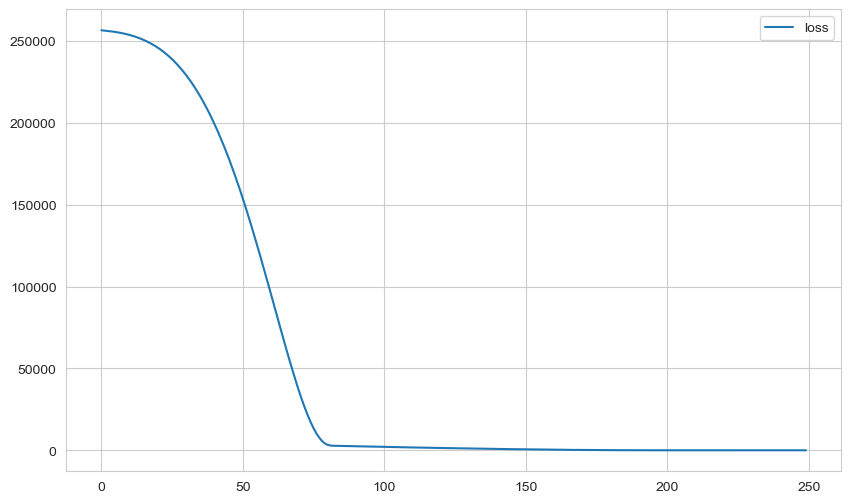

In [34]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

(0.0, 3000.0)

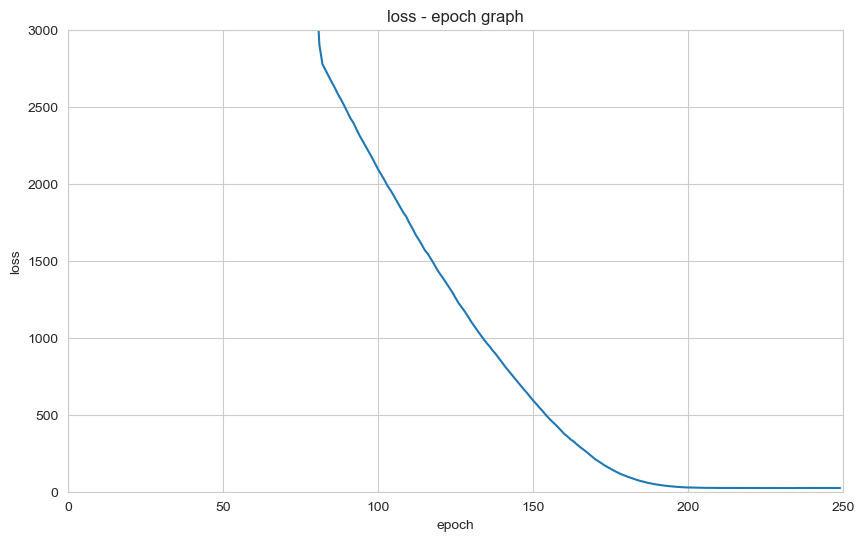

In [35]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

## Model Performance

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [37]:
model.evaluate(X_train, y_train, verbose=0)

24.40730094909668

In [38]:
model.evaluate(X_test, y_test, verbose=0)

25.07406234741211

In [39]:
y_pred = model.predict(X_test)
y_pred.shape

10/10 [==============================] - 0s 1ms/step


(300, 1)

In [40]:
y_test.shape

(300,)

In [41]:
y_pred.reshape(-1,).shape

(300,)

In [42]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
713,387.646,389.937
845,579.431,577.381
333,646.824,641.323
501,315.519,321.054
432,477.806,478.264
199,524.473,524.894
33,448.430,459.687
689,246.740,250.429
764,323.747,321.228
465,586.560,578.701


<AxesSubplot:xlabel='Actual', ylabel='Pred'>

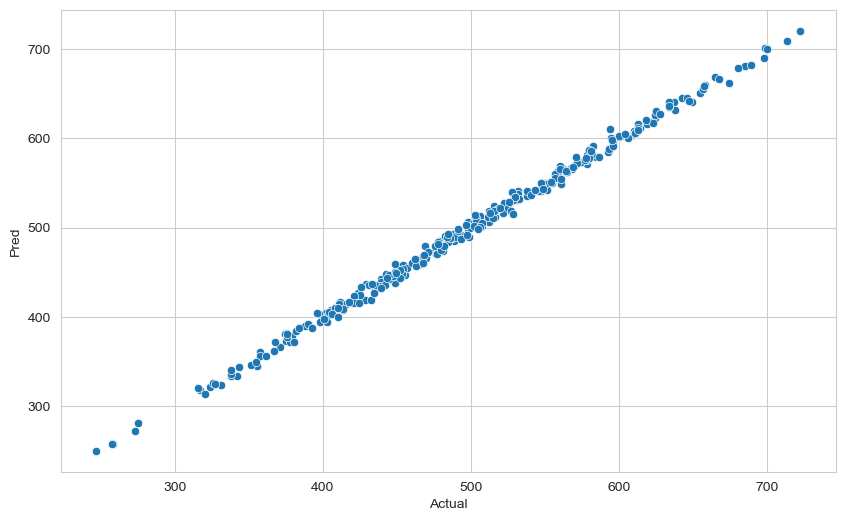

In [43]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)

In [44]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [45]:
eval_metric(y_test, y_pred)

r2_score: 0.9971480916652129 
mae: 4.009181603763412 
mse: 25.074068386302855 
rmse: 5.007401360616388


## Final Model and Model Deployment

### Final Model Training

In [46]:
scaler = MinMaxScaler().fit(X)

In [47]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [48]:
X_scaled = scaler.transform(X)

In [49]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[1]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 257410.5625
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 257326.4062
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 257226.7188
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 257107.3438
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 256962.3750
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 256789.1406
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 256580.8281
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 256333.1250
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 256041.0469
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 255700.9375
Epoch 11/250
32/32 [==============================] - 0s 2ms/step - loss: 255310.8125
Epoch 12/250
32/32 [==============================] - 0s 2ms/st

32/32 [==============================] - 0s 1ms/step - loss: 918.3526
Epoch 98/250
32/32 [==============================] - 0s 1ms/step - loss: 892.4507
Epoch 99/250
32/32 [==============================] - 0s 2ms/step - loss: 865.3721
Epoch 100/250
32/32 [==============================] - 0s 1ms/step - loss: 842.3331
Epoch 101/250
32/32 [==============================] - 0s 1ms/step - loss: 814.5674
Epoch 102/250
32/32 [==============================] - 0s 1ms/step - loss: 787.0262
Epoch 103/250
32/32 [==============================] - 0s 1ms/step - loss: 759.6403
Epoch 104/250
32/32 [==============================] - 0s 1ms/step - loss: 734.0576
Epoch 105/250
32/32 [==============================] - 0s 2ms/step - loss: 711.8964
Epoch 106/250
32/32 [==============================] - 0s 1ms/step - loss: 688.5756
Epoch 107/250
32/32 [==============================] - 0s 2ms/step - loss: 665.4208
Epoch 108/250
32/32 [==============================] - 0s 1ms/step - loss: 641.7837
Epoch 10

32/32 [==============================] - 0s 2ms/step - loss: 24.5638
Epoch 196/250
32/32 [==============================] - 0s 2ms/step - loss: 24.4140
Epoch 197/250
32/32 [==============================] - 0s 2ms/step - loss: 24.5240
Epoch 198/250
32/32 [==============================] - 0s 2ms/step - loss: 24.4198
Epoch 199/250
32/32 [==============================] - 0s 2ms/step - loss: 24.2338
Epoch 200/250
32/32 [==============================] - 0s 1ms/step - loss: 24.5166
Epoch 201/250
32/32 [==============================] - 0s 1ms/step - loss: 24.2210
Epoch 202/250
32/32 [==============================] - 0s 1ms/step - loss: 24.4671
Epoch 203/250
32/32 [==============================] - 0s 1ms/step - loss: 24.5531
Epoch 204/250
32/32 [==============================] - 0s 1ms/step - loss: 24.5440
Epoch 205/250
32/32 [==============================] - 0s 1ms/step - loss: 24.4933
Epoch 206/250
32/32 [==============================] - 0s 1ms/step - loss: 24.6336
Epoch 207/250
32/3

In [51]:
final_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


### Saving a Model

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

Keras saves models by inspecting their architectures. This technique saves everything:

- The weight values
- The model's architecture
- The model's training configuration (what you pass to the .compile() method)
- The optimizer and its state, if any (this enables you to restart training where you left off)

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).



In [52]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

In [69]:
#final_model.save("model_fake_reg") 

### Loading Model

In [53]:
from tensorflow.keras.models import load_model

In [54]:
model_fake_reg = load_model('model_fake_reg.h5')

In [55]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

## Prediction-1

In [56]:
sample = [[998, 1000]]

In [57]:
sample_scaled = scaler_fake_reg.transform(sample)

In [58]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 81ms/step


array([[418.91534]], dtype=float32)

## Prediction-2

In [59]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [60]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [61]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [62]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 23ms/step


array([[378.8458 ],
       [330.5352 ],
       [282.2246 ],
       [233.91405],
       [185.60347]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___